# Case Study on Measures of Central Tendency and Dispersion


##### An  Institution  wishes  to  find  out  their  student's  ability  in  maths,  reading  and writing skills.  The  Institution  wants  to  do  an  exploratory   study  to  check  the following information.

1.  Find out how many males and females participated in the test.
2.  What do you think about the students' parental level of education?
3.  Who scores the most on average for math, reading and writing based on
*    Gender
*    Test preparation course
4.  What do you think about the scoring variation for math, reading and writing based on
*    Gender
*    Test preparation course
5.  The  management  needs  your  help  to  give  bonus  points  to the  top 25% of students based on their maths score, so how will you help the management to achieve this.

### Dataset Used : StudentsPerformance.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
std_data=pd.read_csv('StudentsPerformance.csv')
std_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [4]:
#Total Size
len(std_data)

1000

### 1. Find out how many males and females participated in the test.

In [5]:
stud_count=std_data.groupby('gender')['gender'].count()
#print(stud_count)
print('Number of female students :',stud_count[0])
print('Number of male students :',stud_count[1])

Number of female students : 518
Number of male students : 482


#### Insight: There are 36 more females participated in the test than males.

### 2. What do you think about the students' parental level of education? 

In [6]:
prnt_edu=std_data.groupby('parental level of education')['parental level of education'].count()
prnt_edu

parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: parental level of education, dtype: int64

In [7]:
#Percentage of parents having higher education than high school 
percent=((prnt_edu[0]+prnt_edu[1]+prnt_edu[3]+prnt_edu[4])/len(std_data))*100
percent

62.5

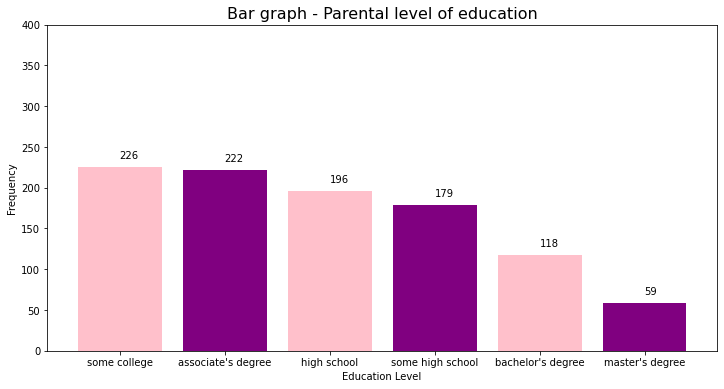

In [8]:
prnt_edu = std_data["parental level of education"].value_counts().to_frame().reset_index()
plt.figure(figsize=(12,6))
plt.bar(prnt_edu['index'],prnt_edu['parental level of education'],color = ['pink','purple'])
plt.title('Bar graph - Parental level of education', fontsize=16)
plt.xlabel('Education Level')
plt.ylabel('Frequency') 
plt.ylim(0,400)

for i,j in zip(prnt_edu['index'],prnt_edu['parental level of education']):
    plt.annotate(str(j),(i,j+10))
plt.show()

#### Insights
* From the above data we can conclude that most of the parents are from the group 'some college'.
* 62.5% of parents have education higher than the high school level

### 3.Who scores the most on average for math, reading and writing based on
#### • Gender 

In [9]:
gender_avg=std_data.groupby('gender')['math score','reading score','writing score'].mean()
gender_avg

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


#### • Test preparation course

In [10]:
test_prep_avg=std_data.groupby('test preparation course')['math score','reading score','writing score'].mean()
test_prep_avg

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


#### Insights:
* The average marks of male students is higher than the female students for maths and for reading and writing female students have higher avaerage marks.
* The average marks of students who completed the test preparation course has higher average than the students who doesn't have any for all the 3 subjects i.e. maths, reading and writing.

### 4.What do you think about the scoring variation for math, reading and writing based on
#### • Gender 

In [11]:
#Standard Deviation based on GENDER
std_data[['gender', 'math score','reading score','writing score']].groupby(['gender']).std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


#### • Test preparation course

In [12]:
#Standard Deviation based on TEST PREPARATION
std_data[['test preparation course','math score','reading score','writing score']].groupby(['test preparation course']).std()

,math score,reading score,writing score
test preparation course,,,
completed,14.521847,13.537572,13.236412
none,15.705689,14.608896,15.041667


#### Insight:
* In math score, for males, the standard deviation is less compared to females. So math scores are consistent for males. For reading score and writing score too, the deviations are very slightly higher for females. So males are having minimum variation of scores in all 3 subjects.
* In math score, reading score and writing score, the students who completed the test preparation course has less standard deviation compared to the others. So their score variation is less in all 3 subjects.

### 5.The management needs your help to give bonus points to the top 25% of students based on their maths score, so how will you help the management to achieve this.

In [13]:
#Sorting data in descending order
sort_data=std_data.sort_values(by=['math score'], ascending=False)
#Since top 25% students gets Bonus points ; n=25
n = 25
top=int(len(sort_data)*(n/100))
bonus_std=sort_data.head(top)
bonus_std

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73


In [14]:
bonus_gender=bonus_std.groupby('gender')['gender'].count()
print('Number of female students getting Bonus Points :',bonus_gender[0])
print('Number of male students getting Bonus Points :',bonus_gender[1])

Number of female students getting Bonus Points : 102
Number of male students getting Bonus Points : 148


#### Insights : 
* 250 students will be there in the first 25% having the highest marks in maths.
* Students having 77 or above marks are selected for Bonus points.
* 46 more males will be getting bonus points than females.